In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [29]:

df = pd.read_csv('spotifyCleaned.csv')
df.head()
df.shape

(114000, 21)

In [30]:
encoder = OneHotEncoder(sparse=False)

genre_encoded = encoder.fit_transform(df[['track_genre']])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['track_genre']))
df_encoded = pd.concat([df.drop(['track_genre'], axis=1), genre_encoded_df], axis=1)

features = df_encoded.drop(['track_id', 'artists', 'album_name', 'track_name', 'popularity'], axis=1)
target = df_encoded['popularity']

features.head()

/Users/eunseokwak/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unnamed: 0,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
target.head()

0    73
1    55
2    57
3    71
4    82
Name: popularity, dtype: int64

In [32]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features, target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train_encoded)

RandomForestRegressor(random_state=42)

In [33]:
y_pred_encoded = model.predict(X_test_encoded)
mse_encoded = mean_squared_error(y_test_encoded, y_pred_encoded)
r2_encoded = r2_score(y_test_encoded, y_pred_encoded)
mse_encoded, r2_encoded

(203.37609342982452, 0.5878744253318793)

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search_rf.fit(X_train_encoded, y_train_encoded)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=  14.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=  15.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=  15.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.2min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 2.5min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 2.5min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 2.5min
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=  14.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=10; total time=  15.0s
[CV] END max_depth=None, min_sampl

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 3, 5], 'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [43]:
# Predict on the test data using the best model
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_encoded)

# Calculate the metrics
mse_rf = mean_squared_error(y_test_encoded, y_pred_rf)
r2_rf = r2_score(y_test_encoded, y_pred_rf)

# Print the results
print("Test MSE: {:.8f}".format(mse_rf))
print("Test R2: {:.8f}".format(r2_rf))

Test MSE: 203.37609343
Test R2: 0.58787443


In [36]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train_encoded, y_train_encoded)
y_pred_knn = knn_model.predict(X_test_encoded)
mse_knn = mean_squared_error(y_test_encoded, y_pred_knn)
r2_knn = r2_score(y_test_encoded, y_pred_knn)

mse_knn, r2_knn

(399.0130403508772, 0.19143161921624285)

In [37]:
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_train_encoded)
y_pred_linear = linear_model.predict(X_test_encoded)
mse_linear = mean_squared_error(y_test_encoded, y_pred_linear)
r2_linear = r2_score(y_test_encoded, y_pred_linear)

mse_linear, r2_linear

(365.50278867372765, 0.25933749496010916)

In [38]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100000, seed=42)
xgb_model.fit(X_train_encoded, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test_encoded)
mse_xgb = mean_squared_error(y_test_encoded, y_pred_xgb)
r2_xgb = r2_score(y_test_encoded, y_pred_xgb)

mse_xgb, r2_xgb

(228.15867032679847, 0.5376544925306501)

In [39]:
xgb_model_tuned = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=10000, 
    max_depth=3,  
    learning_rate=0.1,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    seed=42
)

eval_set = [(X_test_encoded, y_test_encoded)]
xgb_model_tuned.fit(X_train_encoded, y_train_encoded, early_stopping_rounds=10, eval_set=eval_set, verbose=False)

y_pred_xgb_tuned = xgb_model_tuned.predict(X_test_encoded)

mse_xgb_tuned = mean_squared_error(y_test_encoded, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test_encoded, y_pred_xgb_tuned)

mse_xgb_tuned, r2_xgb_tuned


/Users/eunseokwak/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


(282.70994869668925, 0.4271106396720086)

In [40]:
df_encoded = df.drop(['Unnamed: 0'], axis=1)


In [41]:
toVisualize =  df_encoded.drop(['track_id', 'artists', 'album_name', 'track_name'], axis= 1)

In [42]:
toVisualize.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


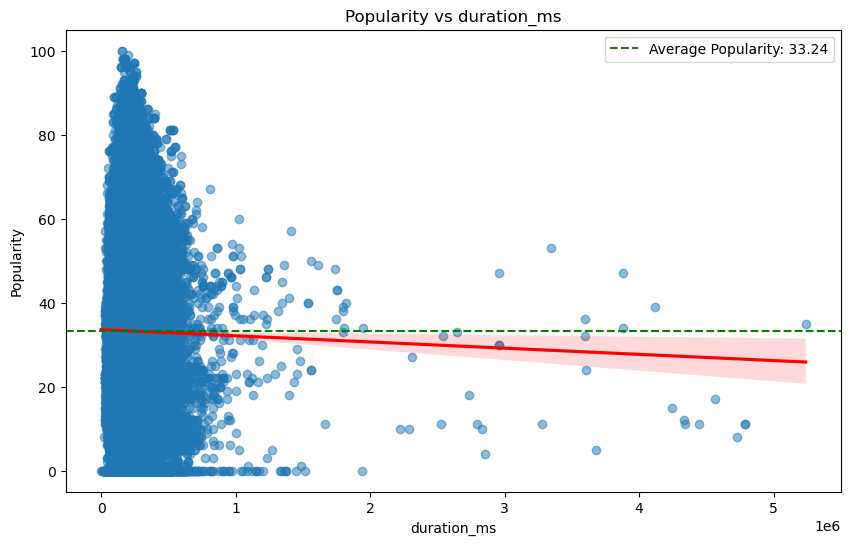

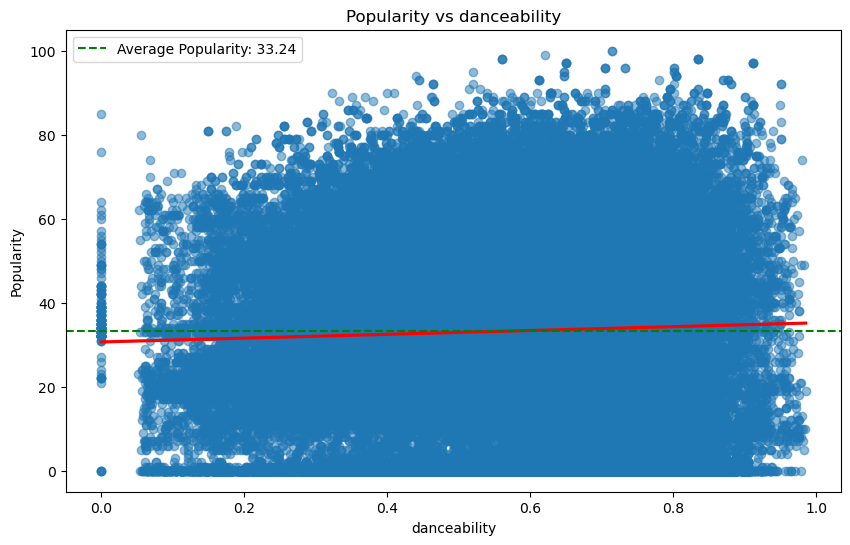

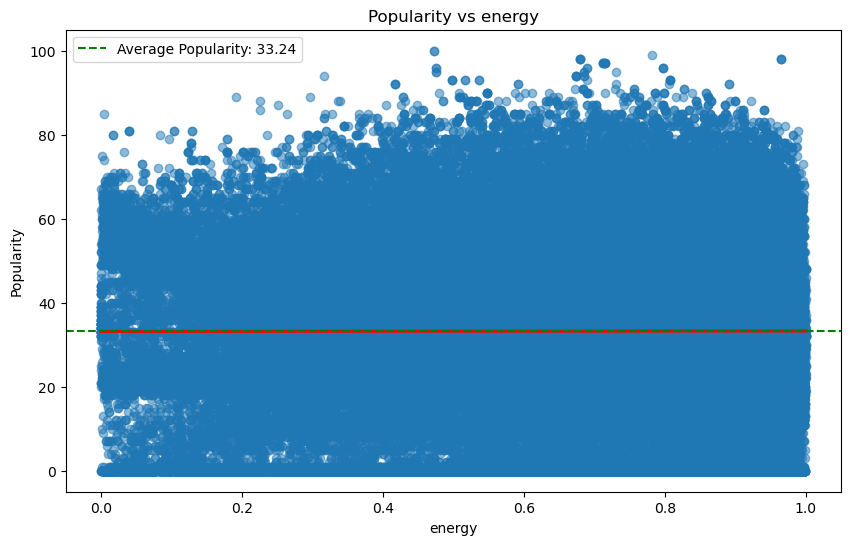

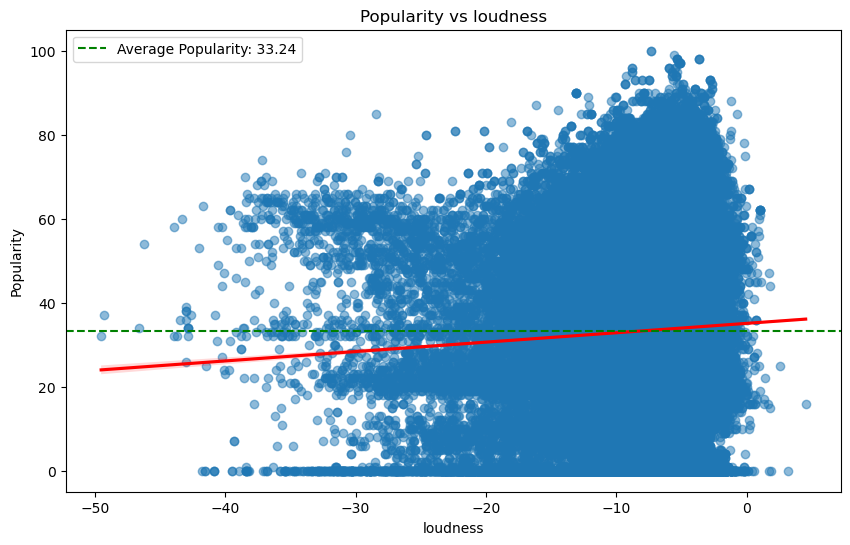

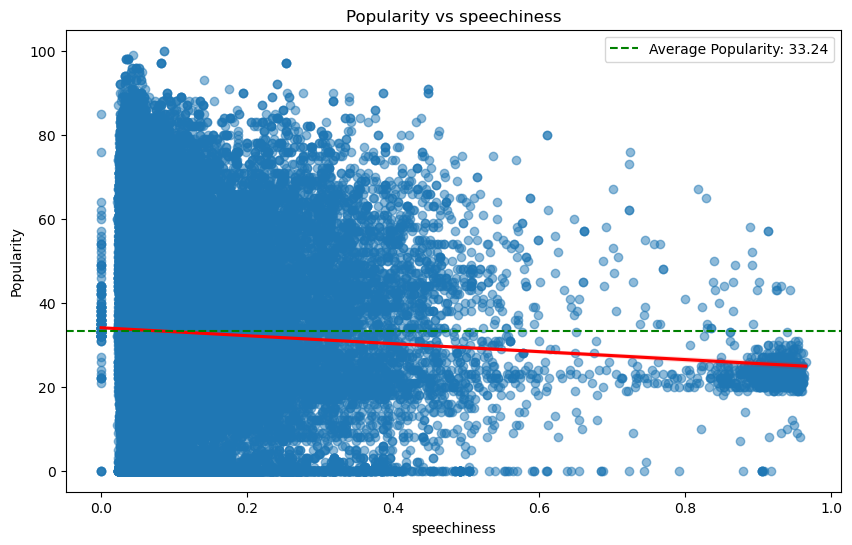

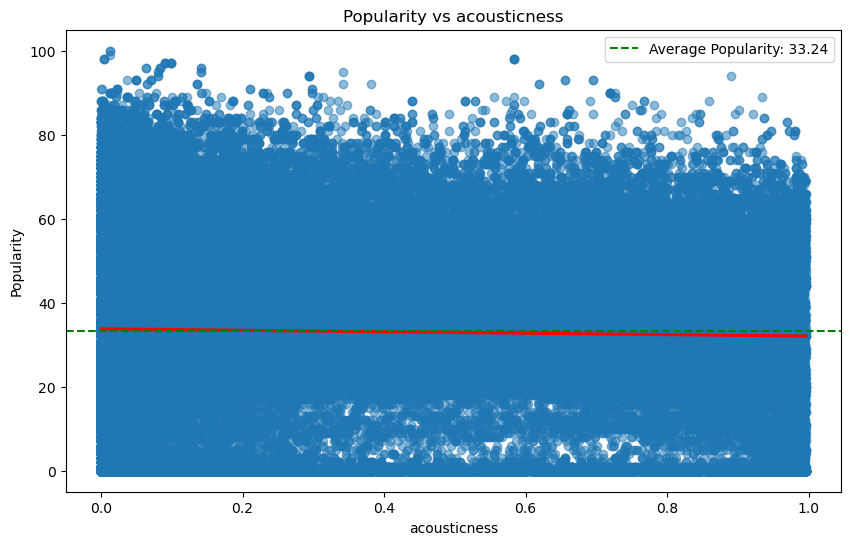

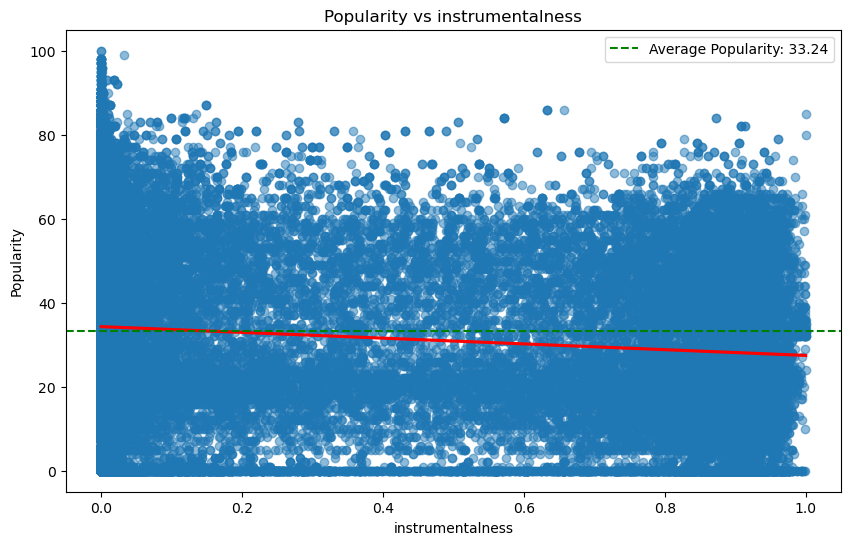

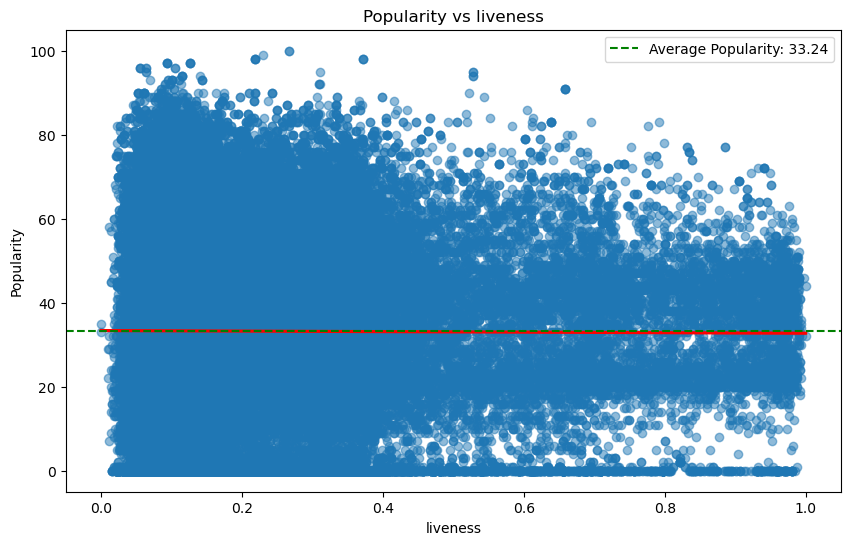

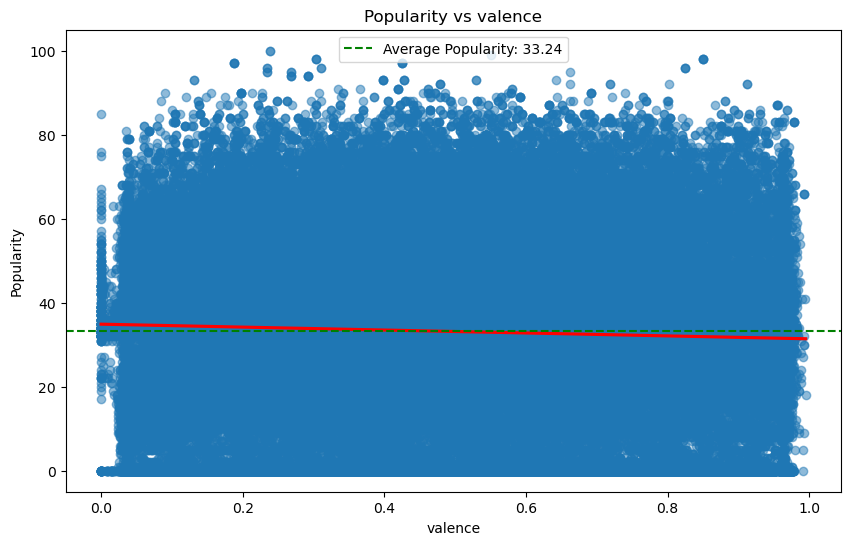

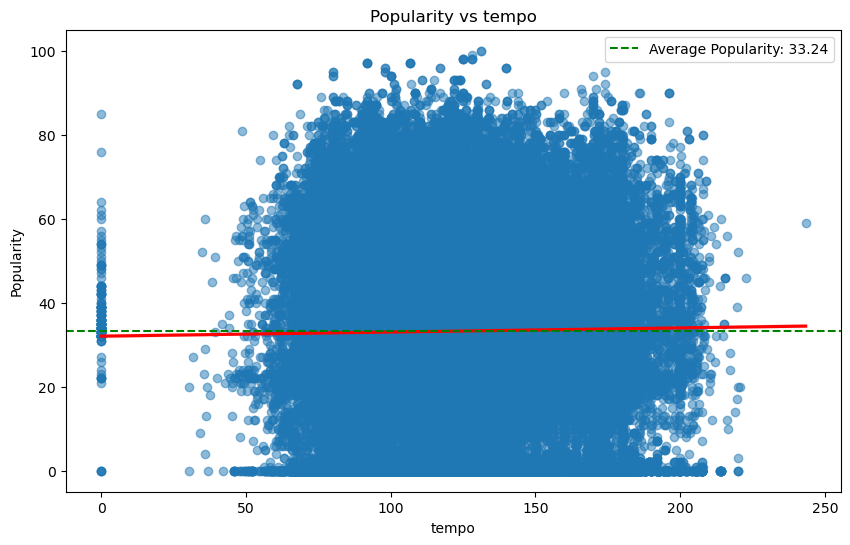

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
toVisualize['explicit'] = toVisualize['explicit'].astype(int)

# List of numerical features to plot against popularity
numerical_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

average_popularity = toVisualize['popularity'].mean()

# Create scatter plots with regression lines for each numerical feature against popularity
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=toVisualize, x=feature, y='popularity', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
    plt.axhline(y=average_popularity, color='green', linestyle='--', label=f'Average Popularity: {average_popularity:.2f}')
    plt.title(f'Popularity vs {feature}')
    plt.ylabel('Popularity')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

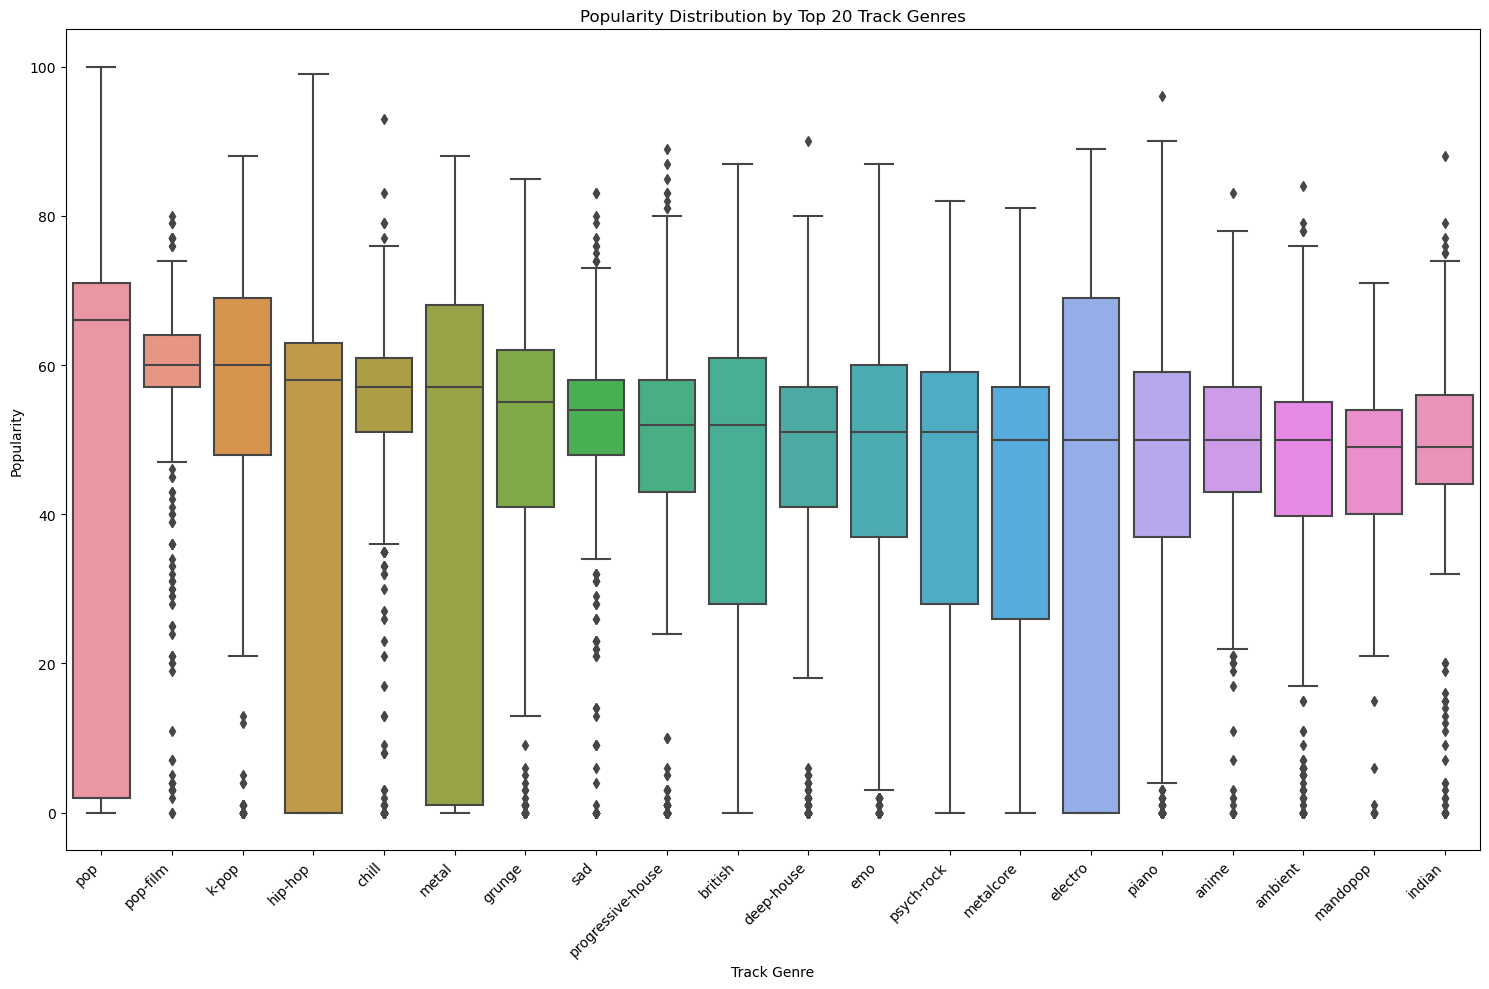

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming toVisualize is your DataFrame and it has already been loaded

# First, group by 'track_genre' and calculate the median popularity for each genre
genre_popularity = toVisualize.groupby('track_genre')['popularity'].median().sort_values(ascending=False)

# Select the top 20 most popular genres
top_genres = genre_popularity.head(20).index

# Filter the DataFrame for only the top genres
top_genres_data = toVisualize[toVisualize['track_genre'].isin(top_genres)]

# Now plot the boxplot with the top genres
plt.figure(figsize=(15, 10))  # Adjust the size as needed
box_plot = sns.boxplot(
    data=top_genres_data,
    x='track_genre',
    y='popularity',
    order=top_genres  # This ensures the genres are ordered by median popularity
)

plt.title('Popularity Distribution by Top 20 Track Genres')
plt.xticks(rotation=45, ha='right')  # Rotate the genre labels and align them to the right for better readability
plt.ylabel('Popularity')
plt.xlabel('Track Genre')

# Improve the layout
plt.tight_layout()

plt.show()
